# create a notebook to perform Runge-Kutta integration

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def dfdx(x,f):
    return x**2 + x

In [56]:
def f_int(x, C):
    return (x**3/3. + 0.5*x**2 + C)

In [57]:
def rk2_core(x_i, f_i, h, g):
    
    #advance f by a step h
    
    #half step
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i, f_i)
    
    #full step
    f_ipo = f_i + h*g(x_ipoh, f_ipoh)
    
    return f_ipo

# Define a wrapper routine for RK2

In [58]:
def rk2(dfdx, a, b, f_a, N):
    #dfdx is the derivative with respect to x
    #a is the lower bound
    #b is the lower bound
    #f_a is the boundary condition at a
    #N is the number of steps
    
    #definre our steps
    x = np.linspace(a,b,N)
    
    #a sintle step size
    h = x[1] - x[0]
    
    f = np.zeros(N, dtype=float)
    
    f[0] = f_a #value of f at a
    
    #evolve for f along x
    for i in range(1,N):
        print(rk2_core(x[i-1],f[i-1],h,dfdx))
        f[i] = rk2_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

In [59]:
def rk4_core(x_i, f_i, h, g):
    
    #define x at 1/2 step
    x_ipoh = x_i + 0.5*h
    
    #define x at 1 step
    x_ipo = x_i + h
    
    #advance f by a step h
    
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    k_4 = h*g(x_ipo, f_i + k_3)
    
    f_ipo = f_i + (k_1 + 2*k_2 + 2*k_3 + k_4)/6.
    
    return f_ipo

In [60]:
def rk4(dfdx, a, b, f_a,N):
    x = np.linspace(a,b,N)
    h = x[1]-x[0]
    f = np.zeros(N, dtype=float)
    
    f[0] = f_a
    
    for i in range(1,N):
        f[i] = rk4_core(x[i-1],f[i-1],h,dfdx)
        
    return x,f

# Perform the integration

0.006515775034293552
0.028120713305898486
0.06755829903978051
0.12757201646090532
0.21090534979423864
0.3203017832647462
0.45850480109739367
0.6282578875171467
0.8323045267489712


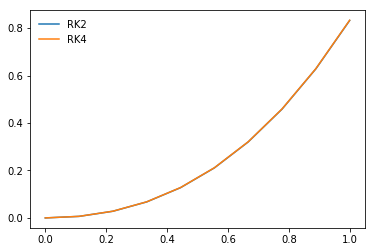

In [61]:
a = 0.0
b = 1.0
f_a = 0.0
N = 10
x_2, f_2 = rk2(dfdx, a, b, f_a, N)
x_4, f_4 = rk4(dfdx, a, b, f_a, N)

x = x_2.copy()
plt.plot(x_2, f_2, label = 'RK2')
plt.plot(x_4, f_4, label = 'RK4')
#plt.plot(x, f_int(x,f_a),'o', label='Analytic')
plt.legend(frameon=False)

0.006515775034293552
0.028120713305898486
0.06755829903978051
0.12757201646090532
0.21090534979423864
0.3203017832647462
0.45850480109739367
0.6282578875171467
0.8323045267489712


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


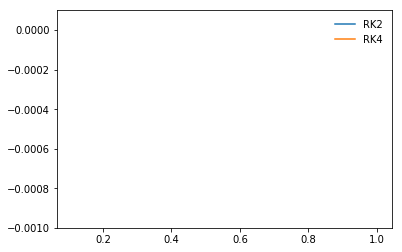

In [63]:
a = 0.0
b = 1.0
f_a = 0.0
N = 10
x_2, f_2 = rk2(dfdx, a, b, f_a, N)
x_4, f_4 = rk4(dfdx, a, b, f_a, N)
x = x_2.copy()
f_analytic = f_int(x, f_a)
error_2 = (f_2-f_analytic)/f_analytic
error_4 = (f_4-f_analytic)/f_analytic

plt.plot(x_2, error_2, label='RK2')
plt.plot(x_2, error_2, label='RK4')
plt.ylim(-1.0e-3,1.0e-4)
plt.legend(frameon=False)
